In [1]:
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
cust_df = pd.read_csv("1632560262896716.csv")
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = np.array(cust_df[["Annual Income (k$)","Spending Score (1-100)","Age"]])

In [5]:
from sklearn.preprocessing import StandardScaler
# Step 3: Scale the features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X_scaled,X_scaled) 
print(dist_matrix)

[[0.         1.63681098 1.28368768 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         2.91275149 ... 4.3182849  5.31878915 4.70189264]
 [1.28368768 2.91275149 0.         ... 5.03379713 4.72114828 5.54808733]
 ...
 [4.54611614 4.3182849  5.03379713 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 4.72114828 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.54808733 ... 0.5647686  2.5274803  0.        ]]


In [11]:
linked = sch.linkage(dist_matrix , method='ward')

/var/folders/zc/4f759yk51xs_rdyhxgs0p1rm0000gn/T/ipykernel_58038/662072568.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(dist_matrix , method='ward')


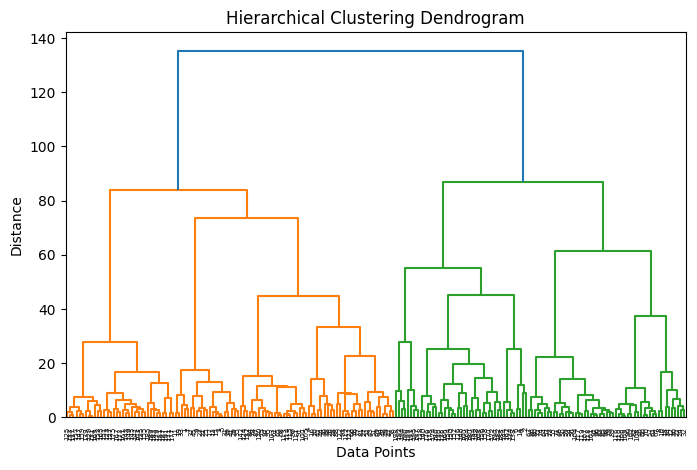

In [12]:
# Plot the Dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [20]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)
labels= agglom.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:588: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


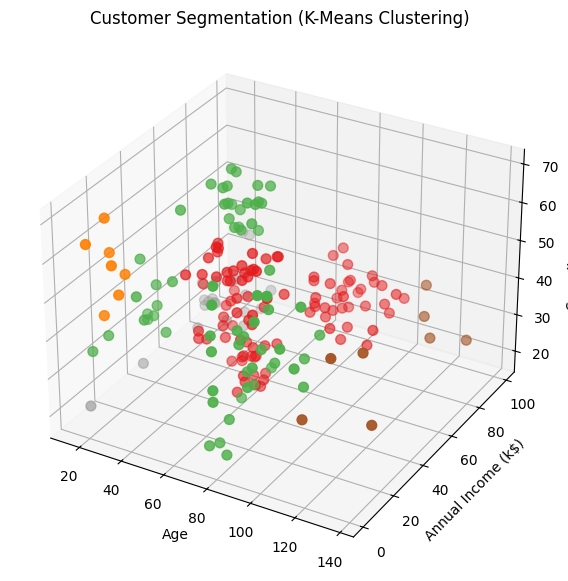

In [21]:
# Step 5: Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    cust_df['Annual Income (k$)'], 
    cust_df['Spending Score (1-100)'], 
    cust_df['Age'], 
    c=labels
)

ax.set_title("Customer Segmentation (K-Means Clustering)")
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score")

plt.show()

In [ ]:
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

In [ ]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

In [ ]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

In [ ]:
pdf['cluster_'] = agglom.labels_
pdf.head()

In [ ]:
import scipy.cluster.hierarchy as sch
linked = sch.linkage(dist_matrix , method='ward')

In [ ]:
# Plot the Dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()